In [1]:
import math
import numpy as np
import matplotlib.pyplot as plt
import cv2
%matplotlib inline

In [2]:
image = cv2.imread(r"img.jpg")
a,b,c= np.shape(image)

In [3]:
grayscaleimage = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)          
grayscaleimage_1 = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)          
unique_array = np.unique(grayscaleimage)
count_array = np.zeros(len(unique_array),int)
cdf_array = np.zeros(len(unique_array),int)
hv_array = np.zeros(len(unique_array),int)

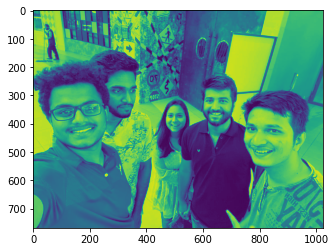

In [4]:
plt.imshow(grayscaleimage)

In [5]:
for i in range(0,len(unique_array)):
    count_array[i] = np.count_nonzero(grayscaleimage == unique_array[i])

cdf_array[0] = count_array[0]

for i in range(1,len(unique_array)):
    cdf_array[i] = cdf_array[i-1] + count_array[i]

cdf_min = min(cdf_array)

for i in range(0,len(unique_array)):
    hv_array[i] = round(((cdf_array[i] - cdf_min)*255)/((a*b) - cdf_min))

for i in range(0,len(unique_array)):
    for j in range(a):
        for k in range(b):
            if(grayscaleimage_1[j][k] == unique_array[i]):
                grayscaleimage_1[j][k] = hv_array[i]
            else:
                continue

In [6]:
print("grayscaleimage =")
print(grayscaleimage)
print("unique_array =")
print(unique_array)
print("count_array =")
print(count_array)
print("cdf_array =")
print(cdf_array)
print("cdf_min = %d"%(cdf_min))
print("hv_array =")
print(hv_array)
print("grayscaleimage_1 =")
print(grayscaleimage_1)

grayscaleimage =
[[156 157 154 ... 173 173 173]
 [165 170 170 ... 173 173 173]
 [171 177 179 ... 173 173 173]
 ...
 [182 182 182 ... 117 112 111]
 [182 182 182 ... 123 120 121]
 [183 183 183 ... 119 119 121]]
unique_array =
[  0   1   2   3   4   5   6   7   8   9  10  11  12  13  14  15  16  17
  18  19  20  21  22  23  24  25  26  27  28  29  30  31  32  33  34  35
  36  37  38  39  40  41  42  43  44  45  46  47  48  49  50  51  52  53
  54  55  56  57  58  59  60  61  62  63  64  65  66  67  68  69  70  71
  72  73  74  75  76  77  78  79  80  81  82  83  84  85  86  87  88  89
  90  91  92  93  94  95  96  97  98  99 100 101 102 103 104 105 106 107
 108 109 110 111 112 113 114 115 116 117 118 119 120 121 122 123 124 125
 126 127 128 129 130 131 132 133 134 135 136 137 138 139 140 141 142 143
 144 145 146 147 148 149 150 151 152 153 154 155 156 157 158 159 160 161
 162 163 164 165 166 167 168 169 170 171 172 173 174 175 176 177 178 179
 180 181 182 183 184 185 186 187 188 189 190 1

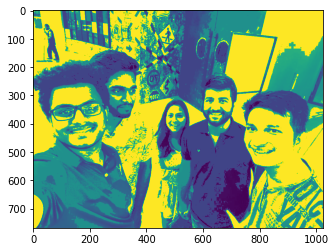

In [7]:
plt.imshow(grayscaleimage_1)

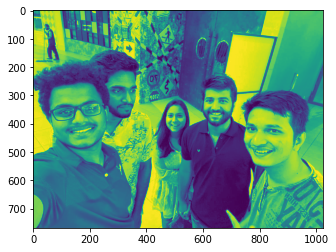

In [8]:
plt.imshow(cv2.equalizeHist(grayscaleimage))

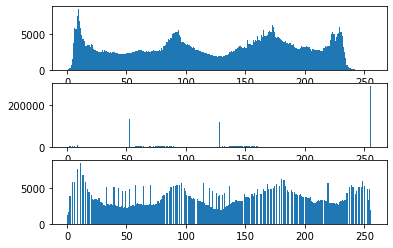

In [9]:
plt.subplot(3,1,1)
plt.hist(grayscaleimage.ravel(),256,[0,256])
plt.subplot(3,1,2)
plt.hist(grayscaleimage_1.ravel(),256,[0,256])
plt.subplot(3,1,3)
plt.hist(cv2.equalizeHist(grayscaleimage).ravel(),256,[0,256])
plt.show()